In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
sc.__version__

'1.10.3'

In [2]:
adata_orig = sc.read_h5ad("/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/data/BRO_timecourse/BRO_RA1_exp023_annotated_integrated_final.h5ad")

In [3]:
adata = sc.read_h5ad('/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/data/BRO_timecourse/BRO_RA1_exp023_annotated_mossi_integrated.h5ad')

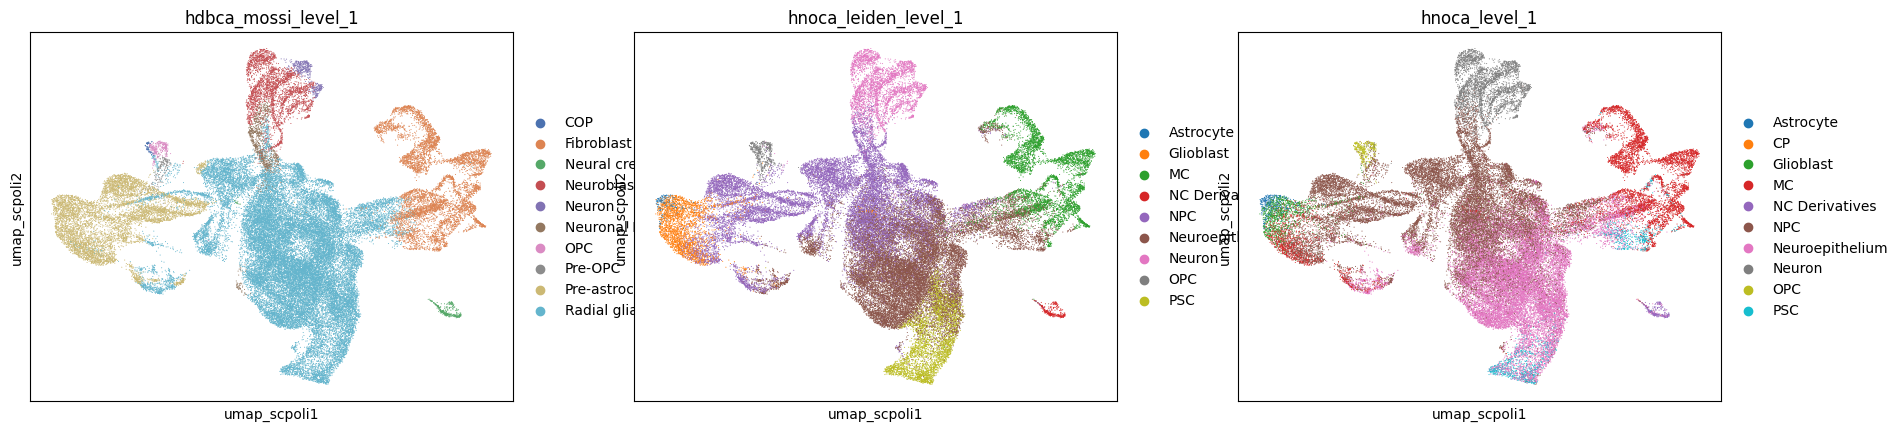

In [7]:
sc.pl.embedding(adata, color=['hdbca_mossi_level_1','hnoca_leiden_level_1','hnoca_level_1'], basis='umap_scpoli')

In [98]:
adata.obs['final_annot_level_1'] = adata.obs['CellClass_Mossi'].astype(str)

In [99]:
adata.obs.loc[adata.obs['final_annot_level_1'] == 'Pre-OPC', 'final_annot_level_1'] = 'OPC'
adata.obs.loc[adata.obs['final_annot_level_1'] == 'COP', 'final_annot_level_1'] = 'OPC'
adata.obs.loc[adata.obs['final_annot_level_1'] == 'Neuroblast', 'final_annot_level_1'] = 'Neuron'
adata.obs.loc[adata.obs['final_annot_level_1'] == 'Neuronal IPC', 'final_annot_level_1'] = 'Neuron'
adata.obs.loc[adata.obs['final_annot_level_1'] == 'Vascular', 'final_annot_level_1'] = 'Fibroblast'
adata.obs.loc[adata.obs['final_annot_level_1'] == 'Erythrocyte', 'final_annot_level_1'] = 'Radial glia'

In [100]:
adata.obs.loc[adata.obs['final_annot_level_1'] == 'Glioblast', 'final_annot_level_1'] = 'Radial glia'
adata.obs.loc[adata.obs['final_annot_level_1'] == 'Pre-astrocyte', 'final_annot_level_1'] = 'Radial glia'
adata.obs.loc[adata.obs['hnoca_leiden_level_1'] == 'PSC', 'final_annot_level_1'] = 'PSC'
adata.obs.loc[adata.obs['hnoca_leiden_level_1'] == 'Neuroepithelium', 'final_annot_level_1'] = 'Neuroepithelium'
adata.obs.loc[adata.obs['hnoca_leiden_level_1'] == 'Glioblast', 'final_annot_level_1'] = 'Glioblast'
adata.obs.loc[adata.obs['hnoca_leiden_level_1'] == 'Astrocyte', 'final_annot_level_1'] = 'Astrocyte'

In [103]:
adata.obs.loc[
    (adata.obs['final_annot_level_1'] == 'Neuron') & (adata.obs['hnoca_leiden_level_1'] == 'Neuroepithelium'), 
    'final_annot_level_1'
] = 'Neuroepithelium'

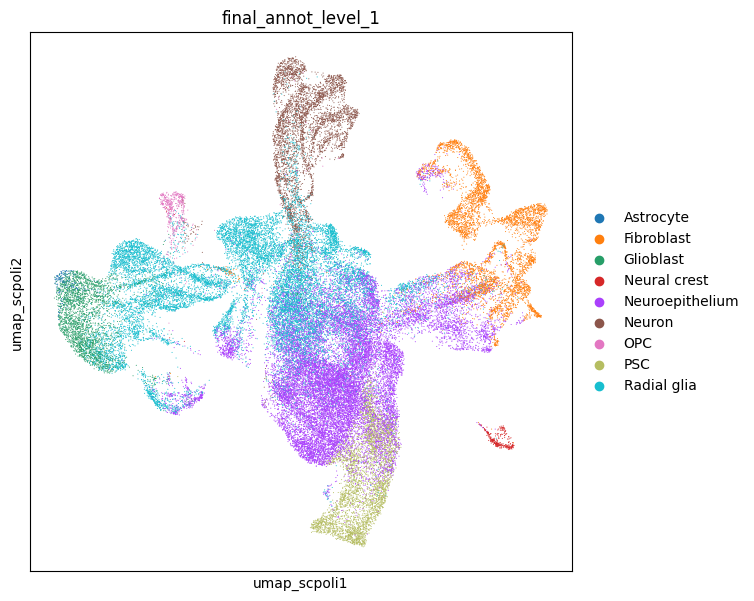

In [104]:
sc.pl.embedding(adata, color='final_annot_level_1', basis='umap_scpoli')

In [106]:
adata.obs['final_annot_level_2'] = adata.obs['final_annot_level_1'].astype(str)

In [107]:
adata.obs.loc[adata.obs['CellClass_Mossi'] == 'COP', 'final_annot_level_2'] = 'COP'
adata.obs.loc[adata.obs['CellClass_Mossi'] == 'Pre-OPC', 'final_annot_level_2'] = 'Pre-OPC'
adata.obs.loc[adata.obs['CellClass_Mossi'] == 'Neuroblast', 'final_annot_level_2'] = 'Neuroblast'
adata.obs.loc[adata.obs['CellClass_Mossi'] == 'Neuronal IPC', 'final_annot_level_2'] = 'Neuronal IPC'
adata.obs.loc[adata.obs['hnoca_leiden_level_1'] == 'Astrocyte', 'final_annot_level_1'] = 'Astrocyte'

In [108]:
adata.obs.loc[
    (adata.obs['final_annot_level_2'] == 'Neuronal IPC') & (adata.obs['hnoca_leiden_level_1'] == 'Neuroepithelium'), 
    'final_annot_level_2'
] = 'Neuroepithelium'

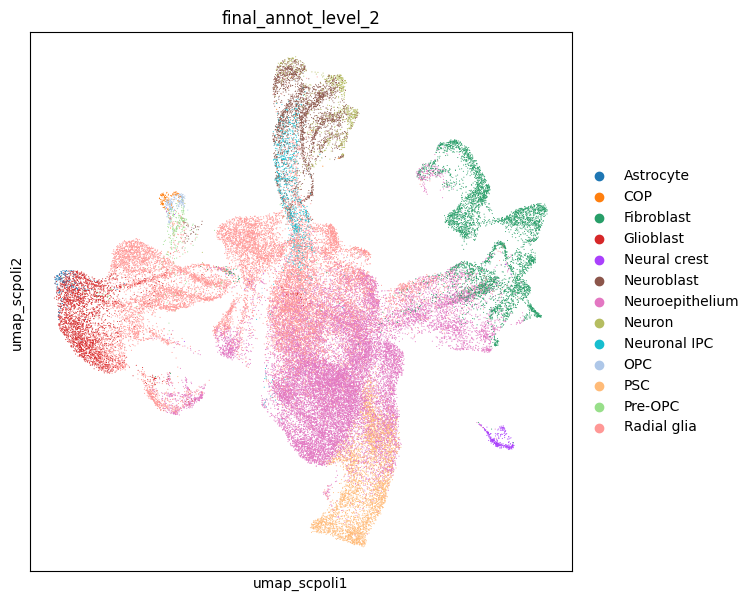

In [109]:
sc.pl.embedding(adata, color='final_annot_level_2', basis='umap_scpoli')

In [4]:
adata.obs['NTT'] = adata.obs.apply(
    lambda row: row['hnoca_level_4'].split('-', 1)[1]  # Extract everything after the first '-'
    if (row['final_annot_level_2'] in ['Neuron', 'Neuroblast'] 
        and isinstance(row['hnoca_level_4'], str) 
        and '-' in row['hnoca_level_4'])
    else np.nan,  # Set to NaN if condition is not met
    axis=1
)

In [91]:
adata.obs['NTT'] = adata.obs['hnoca_level_4']

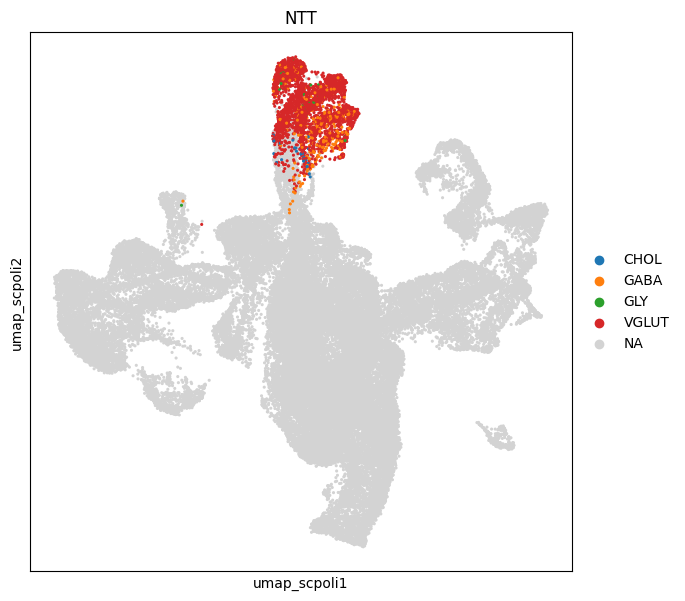

In [5]:
plt.rcParams['figure.figsize']=(7,7)
sc.pl.embedding(adata, color=['NTT'], basis='umap_scpoli', size=20)

In [110]:
adata.write_h5ad('/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/data/BRO_timecourse/BRO_RA1_exp023_annotated_mossi_integrated.h5ad')

In [4]:
adata = adata_orig

In [ ]:
adata_orig.obs['final_annot_level_1'] = adata.obs['final_annot_level_1']
adata_orig.obs['final_annot_level_2'] = adata.obs['final_annot_level_2']
adata_orig.obs['CellClass_Mossi'] = adata.obs['CellClass_Mossi']
adata_orig.obs['NTT'] = adata.obs['NTT']

In [ ]:
adata.write_h5ad("/hpc/pmc_rios/2.personal/rariese/scseq_analysis/BRO/time_course/data/BRO_timecourse/BRO_RA1_exp023_annotated_integrated_final.h5ad")